In [95]:
import pandas as pd
import networkx as nx
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [96]:
# create two dataframes with the data needed
df_emails = pd.read_csv('3.Disappearance at GAStech/data/data/email headers.csv', encoding='cp1252')
df_employees = pd.read_excel('3.Disappearance at GAStech/data/data/EmployeeRecords.xlsx')

In [97]:
# Convert date column to date
df_emails['Date'] =pd.to_datetime(df_emails.Date)

In [98]:
# Find time of the day
df_emails['just_date'] = df_emails['Date'].dt.date

In [99]:
# Create a function to get the time of the day
def find_time_of_day(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour <= 12 ):
        return 'Morning'
    elif (hour > 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20) :
        return 'Evening'
    elif (hour > 20) and (hour <= 23):
        return'Night'
    elif (hour > 23) and (hour <= 1):
        return'MidNight'
    elif (x <= 4):
        return'Late Night'

In [100]:
# Create a column with the time of the day
df_emails['Time_of_day'] = df_emails['Date'].dt.hour.apply(find_time_of_day)

In [101]:
df_emails['Time_of_day'].value_counts()

Noon             569
Morning          320
Evening          256
Early Morning     16
Night              9
Name: Time_of_day, dtype: int64

In [102]:
df_emails.loc[df_emails['Time_of_day'] == 'Night']

,From,To,Date,Subject,just_date,Time_of_day
331,Sven.Flecha@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Lucas.Alcazar@...",2014-01-08 21:04:00,RE: Question about behavior of field device,2014-01-08,Night
332,Sven.Flecha@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Lucas.Alcazar@...",2014-01-08 21:09:00,RE: Question about behavior of field device,2014-01-08,Night
333,Lars.Azada@gastech.com.kronos,"Adra.Nubarron@gastech.com.kronos, Lars.Azada@g...",2014-01-08 21:18:00,RE: Field work rotation schedule,2014-01-08,Night
434,Claudio.Hawelon@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Adan.Morlun...",2014-01-09 21:10:00,RE: Mandatory safety training,2014-01-09,Night
435,Dylan.Scozzese@gastech.com.kronos,"Claudio.Hawelon@gastech.com.kronos, Dante.Cogi...",2014-01-09 21:27:00,RE: Mandatory safety training,2014-01-09,Night
436,Dylan.Scozzese@gastech.com.kronos,"Varro.Awelon@gastech.com.kronos, Adan.Morlun@g...",2014-01-09 22:33:00,RE: Mandatory safety training,2014-01-09,Night
668,Isak.Baza@gastech.com.kronos,"Sven.Flecha@gastech.com.kronos, Lucas.Alcazar@...",2014-01-13 21:15:00,RE: Hackathon Friday night - my place,2014-01-13,Night
669,Inga.Ferro@gastech.com.kronos,"Inga.Ferro@gastech.com.kronos, Loreto.Bodrogi@...",2014-01-13 21:33:00,RE: FW: ARISE - Inspiration for Defenders of K...,2014-01-13,Night
810,Ingrid.Barranco@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",2014-01-14 21:00:00,RE: Updated Safety Policies,2014-01-14,Night


In [103]:
df_emails['just_date'].value_counts()

2014-01-07    141
2014-01-14    141
2014-01-17    137
2014-01-10    117
2014-01-13    116
2014-01-16    114
2014-01-15    108
2014-01-09    103
2014-01-08     99
2014-01-06     94
Name: just_date, dtype: int64

In [104]:
df_emails['To'] = df_emails['To'].apply(lambda x: x.split(','))

In [105]:
df_emails = df_emails.explode('To')

In [106]:
df_emails.To = df_emails.To.str.replace(' ', '')
df_emails.From = df_emails.From.str.replace(' ', '')
df_employees.EmailAddress = df_employees.EmailAddress.str.replace(' ', '')

In [107]:
df_emails

,From,To,Date,Subject,just_date,Time_of_day
0,Sven.Flecha@gastech.com.kronos,Isak.Baza@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning
0,Sven.Flecha@gastech.com.kronos,Lucas.Alcazar@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Felix.Resumir@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Hideki.Cocinaro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Inga.Ferro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
...,...,...,...,...,...,...
1169,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening


In [108]:
# df_emails_on['To'] = df_emails['To'].apply(lambda x: x.split('@')[0])
# df_emails_on['From'] = df_emails['From'].apply(lambda x: x.split('@')[0])

In [109]:
# Drop rows that have the same person in From and To
df_emails = df_emails[df_emails['From'] != df_emails['To']]

In [110]:
df_emails

,From,To,Date,Subject,just_date,Time_of_day
0,Sven.Flecha@gastech.com.kronos,Isak.Baza@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning
0,Sven.Flecha@gastech.com.kronos,Lucas.Alcazar@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Felix.Resumir@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Hideki.Cocinaro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
1,Kanon.Herrero@gastech.com.kronos,Inga.Ferro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning
...,...,...,...,...,...,...
1169,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening
1169,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening


In [111]:
# df_emails['LastNameFrom'] = df_emails['From'].apply(lambda x: x.split('.')[1])
# df_emails['LastNameTo'] = df_emails['To'].apply(lambda x: x.split('.')[1])

In [112]:
df_employees_from = df_employees.add_suffix('_From')
df_employees_to = df_employees.add_suffix('_To')

In [113]:
merge_from = pd.merge(df_emails, df_employees_from, how='left', left_on='From', right_on='EmailAddress_From')

In [114]:
final = pd.merge(merge_from, df_employees_to, how='left', left_on='To', right_on='EmailAddress_To')

In [115]:
final

,From,To,Date,Subject,just_date,Time_of_day,LastName_From,FirstName_From,BirthDate_From,BirthCountry_From,...,PassportCountry_To,PassportIssueDate_To,PassportExpirationDate_To,CurrentEmploymentType_To,CurrentEmploymentTitle_To,CurrentEmploymentStartDate_To,EmailAddress_To,MilitaryServiceBranch_To,MilitaryDischargeType_To,MilitaryDischargeDate_To
0,Sven.Flecha@gastech.com.kronos,Isak.Baza@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning,Flecha,Sven,1986-11-11,Tethys,...,Tethys,2008-08-13,2018-08-12,Information Technology,IT Technician,2002-03-20,Isak.Baza@gastech.com.kronos,NaN,NaN,NaT
1,Sven.Flecha@gastech.com.kronos,Lucas.Alcazar@gastech.com.kronos,2014-01-06 08:39:00,GT-SeismicProcessorPro Bug Report,2014-01-06,Early Morning,Flecha,Sven,1986-11-11,Tethys,...,Tethys,2013-01-24,2023-01-23,Information Technology,IT Helpdesk,2010-11-30,Lucas.Alcazar@gastech.com.kronos,NaN,NaN,NaT
2,Kanon.Herrero@gastech.com.kronos,Felix.Resumir@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning,Herrero,Kanon,1984-10-03,Tethys,...,Tethys,2005-03-20,2015-03-19,Security,Security Group Manager,2003-09-15,Felix.Resumir@gastech.com.kronos,TethanDefenseForceArmy,HonorableDischarge,1997-10-01
3,Kanon.Herrero@gastech.com.kronos,Hideki.Cocinaro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning,Herrero,Kanon,1984-10-03,Tethys,...,Tethys,2013-05-25,2023-05-24,Security,Site Control,2010-01-01,Hideki.Cocinaro@gastech.com.kronos,TethanDefenseForceArmy,HonorableDischarge,2009-10-01
4,Kanon.Herrero@gastech.com.kronos,Inga.Ferro@gastech.com.kronos,2014-01-06 08:58:00,Inspection request for site,2014-01-06,Early Morning,Herrero,Kanon,1984-10-03,Tethys,...,NaN,NaT,NaT,Security,Site Control,2013-01-11,Inga.Ferro@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2012-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaN,NaT,NaT,Facilities,Truck Driver,2003-12-02,Valeria.Morlun@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2001-10-01
8252,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaN,NaT,NaT,Facilities,Truck Driver,2009-04-30,Cecilia.Morluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2008-10-01
8253,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaN,NaT,NaT,Facilities,Truck Driver,2013-07-12,Henk.Mies@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2004-10-01
8254,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaN,NaT,NaT,Facilities,Truck Driver,2007-03-01,Dylan.Scozzese@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2006-10-01


In [116]:
G = nx.from_pandas_edgelist(final, source='From', target='To')

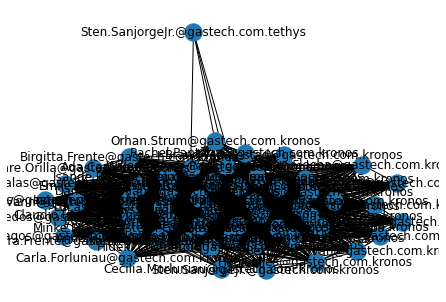

In [117]:
nx.draw(G, with_labels = True);

In [118]:
newdf = final.drop_duplicates(
  subset = ['From', 'To'],
  keep = 'last').reset_index(drop = True)

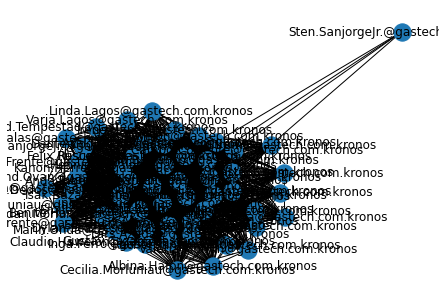

In [119]:
G = nx.from_pandas_edgelist(newdf, source='From', target='To')
nx.draw(G, with_labels = True);

In [120]:
newdf['combination'] = list(zip(newdf.From, newdf.To))
newdf

,From,To,Date,Subject,just_date,Time_of_day,LastName_From,FirstName_From,BirthDate_From,BirthCountry_From,...,PassportIssueDate_To,PassportExpirationDate_To,CurrentEmploymentType_To,CurrentEmploymentTitle_To,CurrentEmploymentStartDate_To,EmailAddress_To,MilitaryServiceBranch_To,MilitaryDischargeType_To,MilitaryDischargeDate_To,combination
0,Linnea.Bergen@gastech.com.kronos,Rachel.Pantanal@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2013-06-13,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Rachel.Pant..."
1,Linnea.Bergen@gastech.com.kronos,Lars.Azada@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2011-06-01,2021-05-31,Engineering,Engineer,1995-12-01,Lars.Azada@gastech.com.kronos,TethanDefenseForceAir,GeneralDischarge,1995-10-01,"(Linnea.Bergen@gastech.com.kronos, Lars.Azada@..."
2,Linnea.Bergen@gastech.com.kronos,Felix.Balas@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2005-04-15,2015-04-14,Engineering,Engineer,2004-09-02,Felix.Balas@gastech.com.kronos,TethanDefenseForceNavy,HonorableDischarge,1988-10-01,"(Linnea.Bergen@gastech.com.kronos, Felix.Balas..."
3,Linnea.Bergen@gastech.com.kronos,Isande.Borrasca@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2008-10-03,2018-10-02,Engineering,Drill Technician,2004-02-18,Isande.Borrasca@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Isande.Borr..."
4,Linnea.Bergen@gastech.com.kronos,Gustav.Cazar@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2009-06-10,2019-06-09,Engineering,Hydraulic Technician,2009-09-15,Gustav.Cazar@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Gustav.Caza..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,NaT,Facilities,Truck Driver,2003-12-02,Valeria.Morlun@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2001-10-01,"(Albina.Hafon@gastech.com.kronos, Valeria.Morl..."
1977,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,NaT,Facilities,Truck Driver,2009-04-30,Cecilia.Morluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2008-10-01,"(Albina.Hafon@gastech.com.kronos, Cecilia.Morl..."
1978,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,NaT,Facilities,Truck Driver,2013-07-12,Henk.Mies@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2004-10-01,"(Albina.Hafon@gastech.com.kronos, Henk.Mies@ga..."
1979,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,NaT,Facilities,Truck Driver,2007-03-01,Dylan.Scozzese@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2006-10-01,"(Albina.Hafon@gastech.com.kronos, Dylan.Scozze..."


In [121]:
newdf['sorted_combination'] = [tuple(sorted(value)) for value in newdf['combination']]
newdf

,From,To,Date,Subject,just_date,Time_of_day,LastName_From,FirstName_From,BirthDate_From,BirthCountry_From,...,PassportExpirationDate_To,CurrentEmploymentType_To,CurrentEmploymentTitle_To,CurrentEmploymentStartDate_To,EmailAddress_To,MilitaryServiceBranch_To,MilitaryDischargeType_To,MilitaryDischargeDate_To,combination,sorted_combination
0,Linnea.Bergen@gastech.com.kronos,Rachel.Pantanal@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Rachel.Pant...","(Linnea.Bergen@gastech.com.kronos, Rachel.Pant..."
1,Linnea.Bergen@gastech.com.kronos,Lars.Azada@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2021-05-31,Engineering,Engineer,1995-12-01,Lars.Azada@gastech.com.kronos,TethanDefenseForceAir,GeneralDischarge,1995-10-01,"(Linnea.Bergen@gastech.com.kronos, Lars.Azada@...","(Lars.Azada@gastech.com.kronos, Linnea.Bergen@..."
2,Linnea.Bergen@gastech.com.kronos,Felix.Balas@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2015-04-14,Engineering,Engineer,2004-09-02,Felix.Balas@gastech.com.kronos,TethanDefenseForceNavy,HonorableDischarge,1988-10-01,"(Linnea.Bergen@gastech.com.kronos, Felix.Balas...","(Felix.Balas@gastech.com.kronos, Linnea.Bergen..."
3,Linnea.Bergen@gastech.com.kronos,Isande.Borrasca@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2018-10-02,Engineering,Drill Technician,2004-02-18,Isande.Borrasca@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Isande.Borr...","(Isande.Borrasca@gastech.com.kronos, Linnea.Be..."
4,Linnea.Bergen@gastech.com.kronos,Gustav.Cazar@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,2019-06-09,Engineering,Hydraulic Technician,2009-09-15,Gustav.Cazar@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Gustav.Caza...","(Gustav.Cazar@gastech.com.kronos, Linnea.Berge..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,Facilities,Truck Driver,2003-12-02,Valeria.Morlun@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2001-10-01,"(Albina.Hafon@gastech.com.kronos, Valeria.Morl...","(Albina.Hafon@gastech.com.kronos, Valeria.Morl..."
1977,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,Facilities,Truck Driver,2009-04-30,Cecilia.Morluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2008-10-01,"(Albina.Hafon@gastech.com.kronos, Cecilia.Morl...","(Albina.Hafon@gastech.com.kronos, Cecilia.Morl..."
1978,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,Facilities,Truck Driver,2013-07-12,Henk.Mies@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2004-10-01,"(Albina.Hafon@gastech.com.kronos, Henk.Mies@ga...","(Albina.Hafon@gastech.com.kronos, Henk.Mies@ga..."
1979,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,NaT,Facilities,Truck Driver,2007-03-01,Dylan.Scozzese@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2006-10-01,"(Albina.Hafon@gastech.com.kronos, Dylan.Scozze...","(Albina.Hafon@gastech.com.kronos, Dylan.Scozze..."


In [122]:
newdf['count'] = 1
newdf['LastName_From'] = newdf['LastName_From'].fillna('No_name')
newdf['LastName_To'] = newdf['LastName_To'].fillna('No_name')

In [123]:
graphdf = newdf.drop_duplicates(subset='sorted_combination', keep="last")
graphdf

,From,To,Date,Subject,just_date,Time_of_day,LastName_From,FirstName_From,BirthDate_From,BirthCountry_From,...,CurrentEmploymentType_To,CurrentEmploymentTitle_To,CurrentEmploymentStartDate_To,EmailAddress_To,MilitaryServiceBranch_To,MilitaryDischargeType_To,MilitaryDischargeDate_To,combination,sorted_combination,count
0,Linnea.Bergen@gastech.com.kronos,Rachel.Pantanal@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Rachel.Pant...","(Linnea.Bergen@gastech.com.kronos, Rachel.Pant...",1
2,Linnea.Bergen@gastech.com.kronos,Felix.Balas@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,Engineering,Engineer,2004-09-02,Felix.Balas@gastech.com.kronos,TethanDefenseForceNavy,HonorableDischarge,1988-10-01,"(Linnea.Bergen@gastech.com.kronos, Felix.Balas...","(Felix.Balas@gastech.com.kronos, Linnea.Bergen...",1
5,Linnea.Bergen@gastech.com.kronos,Lidelse.Dedos@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,Engineering,Engineering Group Manager,2003-03-01,Lidelse.Dedos@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Lidelse.Ded...","(Lidelse.Dedos@gastech.com.kronos, Linnea.Berg...",1
6,Linnea.Bergen@gastech.com.kronos,Birgitta.Frente@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,Engineering,Geologist,1999-05-03,Birgitta.Frente@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Birgitta.Fr...","(Birgitta.Frente@gastech.com.kronos, Linnea.Be...",1
7,Linnea.Bergen@gastech.com.kronos,Vira.Frente@gastech.com.kronos,2014-01-06 11:16:00,RE: Upcoming birthdays,2014-01-06,Morning,Bergen,Linnea,1969-07-10,Tethys,...,Engineering,Hydraulic Technician,2001-12-01,Vira.Frente@gastech.com.kronos,NaN,NaN,NaT,"(Linnea.Bergen@gastech.com.kronos, Vira.Frente...","(Linnea.Bergen@gastech.com.kronos, Vira.Frente...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,Albina.Hafon@gastech.com.kronos,Valeria.Morlun@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,Facilities,Truck Driver,2003-12-02,Valeria.Morlun@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2001-10-01,"(Albina.Hafon@gastech.com.kronos, Valeria.Morl...","(Albina.Hafon@gastech.com.kronos, Valeria.Morl...",1
1977,Albina.Hafon@gastech.com.kronos,Cecilia.Morluniau@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,Facilities,Truck Driver,2009-04-30,Cecilia.Morluniau@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2008-10-01,"(Albina.Hafon@gastech.com.kronos, Cecilia.Morl...","(Albina.Hafon@gastech.com.kronos, Cecilia.Morl...",1
1978,Albina.Hafon@gastech.com.kronos,Henk.Mies@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,Facilities,Truck Driver,2013-07-12,Henk.Mies@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2004-10-01,"(Albina.Hafon@gastech.com.kronos, Henk.Mies@ga...","(Albina.Hafon@gastech.com.kronos, Henk.Mies@ga...",1
1979,Albina.Hafon@gastech.com.kronos,Dylan.Scozzese@gastech.com.kronos,2014-01-17 20:46:00,RE: Traffic advisory for today,2014-01-17,Evening,Hafon,Albina,1987-06-14,Kronos,...,Facilities,Truck Driver,2007-03-01,Dylan.Scozzese@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2006-10-01,"(Albina.Hafon@gastech.com.kronos, Dylan.Scozze...","(Albina.Hafon@gastech.com.kronos, Dylan.Scozze...",1


In [124]:
graphdf['sorted_combination'].nunique()

1266

In [125]:
graph_1Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-06', "%Y-%m-%d").date())]
graph_2Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-07', "%Y-%m-%d").date())]
graph_3Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-08', "%Y-%m-%d").date())]
graph_4Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-09', "%Y-%m-%d").date())]
graph_5Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-10', "%Y-%m-%d").date())]
graph_6Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-13', "%Y-%m-%d").date())]
graph_7Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-14', "%Y-%m-%d").date())]
graph_8Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-15', "%Y-%m-%d").date())]
graph_9Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-16', "%Y-%m-%d").date())]
graph_10Day = graphdf[(graphdf['just_date'] == datetime.strptime('2014-01-17', "%Y-%m-%d").date())]

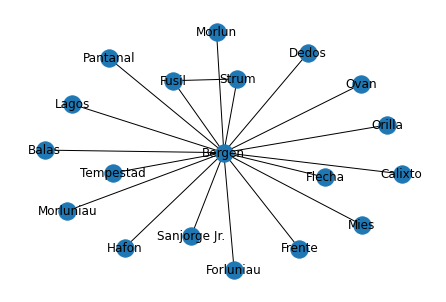

In [126]:
G = nx.from_pandas_edgelist(graph_1Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

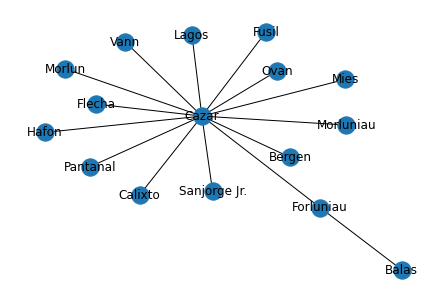

In [127]:
G = nx.from_pandas_edgelist(graph_2Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

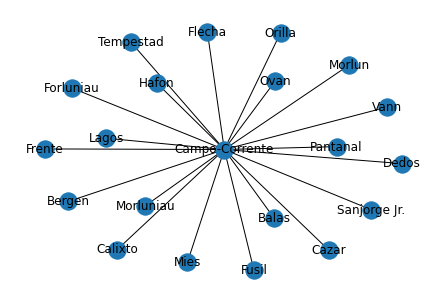

In [128]:
G = nx.from_pandas_edgelist(graph_3Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

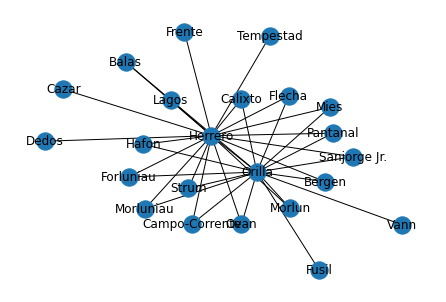

In [129]:
G = nx.from_pandas_edgelist(graph_4Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

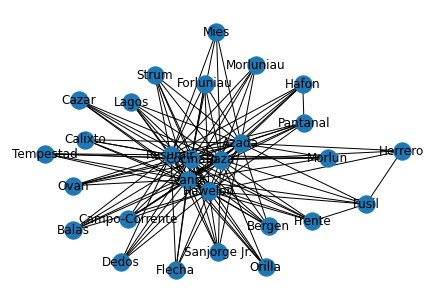

In [130]:
G = nx.from_pandas_edgelist(graph_5Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

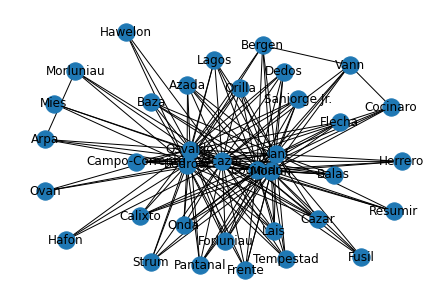

In [131]:
G = nx.from_pandas_edgelist(graph_7Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

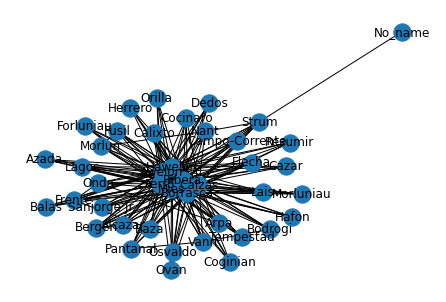

In [132]:
G = nx.from_pandas_edgelist(graph_8Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

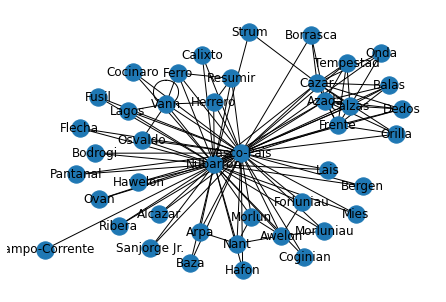

In [133]:
G = nx.from_pandas_edgelist(graph_9Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

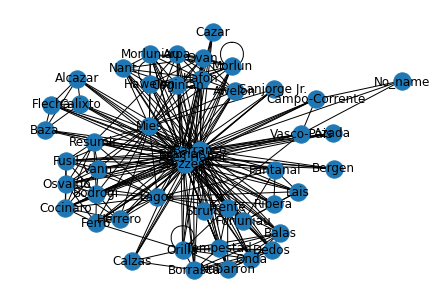

In [134]:
G = nx.from_pandas_edgelist(graph_10Day, source='LastName_From', target='LastName_To')
nx.draw(G, with_labels = True);

In [135]:
# before = newdf.loc[(newdf['just_date'] <= datetime.strptime("2014-01-14", "%Y-%m-%d").date())]
# G = nx.from_pandas_edgelist(before, source='LastName_From', target='LastName_To')
# nx.draw(G, with_labels = True);

In [136]:
# after = newdf.loc[(newdf['just_date'] > datetime.strptime("2014-01-14", "%Y-%m-%d").date())]
# G = nx.from_pandas_edgelist(before, source='LastName_From', target='LastName_To')
# nx.draw(G, with_labels = True);

In [137]:
a = nx.adjacency_matrix(G).todense()

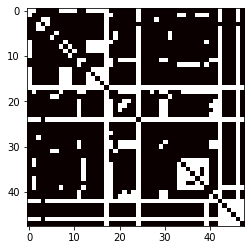

In [138]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [139]:
newdf['count'] = 1
newdf['LastName_From'] = newdf['LastName_From'].fillna('No_name')
newdf['LastName_To'] = newdf['LastName_To'].fillna('No_name')

In [140]:
import plotly.express as px

graphdf_names = newdf[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(graphdf_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
pivot

LastName_To,Alcazar,Arpa,Awelon,Azada,Balas,Barranco,Baza,Bergen,Bodrogi,Borrasca,...,Ovan,Pantanal,Resumir,Ribera,Sanjorge Jr.,Scozzese,Strum,Tempestad,Vann,Vasco-Pais
LastName_From,,,,,,,,,,,,,,,,,,,,,
Alcazar,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Arpa,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Awelon,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Azada,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Balas,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Barranco,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Baza,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Bergen,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Bodrogi,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


In [141]:
fig = px.imshow(pivot)
fig.show()

In [142]:
new_1Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-06', "%Y-%m-%d").date())]
new_2Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-07', "%Y-%m-%d").date())]
new_3Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-08', "%Y-%m-%d").date())]
new_4Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-09', "%Y-%m-%d").date())]
new_5Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-10', "%Y-%m-%d").date())]
new_6Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-13', "%Y-%m-%d").date())]
new_7Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-14', "%Y-%m-%d").date())]
new_8Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-15', "%Y-%m-%d").date())]
new_9Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-16', "%Y-%m-%d").date())]
new_10Day = newdf[(newdf['just_date'] == datetime.strptime('2014-01-17', "%Y-%m-%d").date())]

In [143]:
new1Day_names = new_1Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new1Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [144]:
new2Day_names = new_2Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new2Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [145]:
new3Day_names = new_3Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new3Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [146]:
new4Day_names = new_4Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new4Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [147]:
new5Day_names = new_5Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new5Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [148]:
new6Day_names = new_6Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new6Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [149]:
new7Day_names = new_7Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new7Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [150]:
new8Day_names = new_8Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new8Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [92]:
new9Day_names = new_9Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new9Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()

In [93]:
new10Day_names = new_10Day[['LastName_From','LastName_To','count']]
pivot = pd.pivot_table(new10Day_names, values='count', index='LastName_From', columns='LastName_To',
               aggfunc='count')
pivot = pivot.fillna(0)
fig = px.imshow(pivot)
fig.show()